# Import package library and global parameter settings

In [1]:
import os
import pandas as pd
import math
import matplotlib.pyplot as plt
import scipy.stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, train_test_split, GridSearchCV
from  sklearn.preprocessing import StandardScaler

In [3]:
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import r2_score  

In [4]:
plt.rcParams['font.sans-serif'] = ['Times New Roman']
plt.rcParams['axes.unicode_minus'] = False

In [5]:
dir_open = r'D:\DoctoralThesis\CorrForScattAna'
dir_write = dir_open

In [6]:
import seaborn as sns

# 1 Reading in parameters and setting them

In [982]:
if __name__ == '__main__':
    GDCalCDOM = pd.read_excel(os.path.join(dir_open,"CDOM(88Points)MachineLearningModelCalibration.xlsx"),sep=',',index_col ='Wavelength')
    GDValCDOM = pd.read_excel(os.path.join(dir_open,"CDOM(88Points)MachineLearningModelValidation.xlsx"),sep=',',index_col ='Wavelength')
    lenSelectedBandNumCDOM = len(GDCalCDOM.columns)-1
    lenCalSampPointsNumCDOM = len(GDCalCDOM.index)
    lenValSampPointsNumCDOM = len(GDValCDOM.index)
    
    cal_data_inputs_CDOM = np.array(GDCalCDOM.iloc[:,0:lenSelectedBandNumCDOM]).reshape(lenCalSampPointsNumCDOM,lenSelectedBandNumCDOM) 
    val_data_inputs_CDOM = np.array(GDValCDOM.iloc[:,0:lenSelectedBandNumCDOM]).reshape(lenValSampPointsNumCDOM,lenSelectedBandNumCDOM)
    cal_data_outputs_CDOM = np.array(GDCalCDOM['CDOM']).reshape(lenCalSampPointsNumCDOM,1)
    val_data_outputs_CDOM = np.array(GDValCDOM['CDOM']).reshape(lenValSampPointsNumCDOM,1)
        
    RFCDOMreg_params = {'n_estimators': 20, 'criterion': 'mse','max_depth': 2,'min_samples_split': 2,'min_samples_leaf': 1,
                           'min_weight_fraction_leaf': 0,'max_features': 'auto','max_leaf_nodes': None,'min_impurity_decrease': 0,
                           'min_impurity_split': 1e-7,'bootstrap': True,'oob_score': False,'random_state': 0, 'ccp_alpha': 0} 

    regCDOM = RandomForestRegressor(**RFCDOMreg_params)  

# GridSearchCV

In [ ]:
    cv_params = {'n_estimators': np.linspace(2,500,499,dtype=int)}

    other_params = {'n_estimators': 60, 'criterion': 'mse','max_depth': 6,'min_samples_split': 2,'min_samples_leaf': 1,
                    'min_weight_fraction_leaf': 0,'max_features': 'auto','max_leaf_nodes': None,'min_impurity_decrease': 0,
                    'min_impurity_split': None,'bootstrap': True,'oob_score': True,'random_state': 0, 'ccp_alpha': 0} 

    model = RandomForestRegressor(**other_params)  
    
    optimized_GBM = GridSearchCV(estimator=model, param_grid=cv_params, scoring='neg_mean_absolute_error', refit = True, cv=5, verbose=1, n_jobs=4)
    optimized_GBM.fit(cal_data_inputs_CDOM, cal_data_outputs_CDOM)

    evalute_result = optimized_GBM.cv_results_
    evalute_params = optimized_GBM.cv_results_['params']
    
    print('每轮迭代运行结果:{0}'.format(evalute_result))
    print('参数的最佳取值：{0}'.format(optimized_GBM.best_params_))
    print('最佳模型得分:{0}'.format(optimized_GBM.best_score_))

# 2 Fit the model to the data set according to the parameters

In [983]:
RFCDOMregmodel = regTSI.fit(cal_data_inputs_CDOM, cal_data_outputs_CDOM) 
cal_data_outputs_pred_CDOM = RFCDOMregmodel.predict(cal_data_inputs_CDOM) 
val_data_outputs_pred_CDOM = RFCDOMregmodel.predict(val_data_inputs_CDOM)
print('cal_data_outputs_pred_CDOM:\n{0}'.format(cal_data_outputs_pred_CDOM)) 
print('val_data_outputs_pred_CDOM:\n{0}'.format(val_data_outputs_pred_CDOM)) 
print(RFCDOMregmodel.score(cal_data_inputs_CDOM, cal_data_outputs_CDOM))  
print(RFCDOMregmodel.score(val_data_inputs_CDOM, val_data_outputs_CDOM))  

cal_data_outputs_pred_CDOM:
[0.21023025 0.07828289 0.12656033 0.11304201 0.06374689 0.16440142
 0.06477184 0.04085066 0.04319317 0.04808097 0.02019556 0.04386044
 0.30983581 0.18954722 0.28012325 0.18766383 0.2846728  0.30376138
 0.31103871 0.25494339 0.31709989 0.44001115 0.26347591 0.30876676
 0.40225491 0.46870346 0.27578145 0.47796519 0.33347523 0.46888315
 0.51574758 0.4883634  0.4962922  0.47723392 0.6115251  0.28485302
 0.51063282 0.48727073 0.34548782 0.54418276 0.35547749 0.57858001
 0.63724888 0.69567423 0.63785569 0.65826794 0.55771673 0.54371614
 0.55029515 0.6728598  0.71806235 0.66075441 0.66932393 0.71646136
 0.74183575 0.86792553 1.17511967 1.30789669 1.35051207]
val_data_outputs_pred_CDOM:
[0.16579255 0.21841825 0.1970508  0.06379108 0.28190454 0.22920012
 0.2937441  0.50445395 0.28842236 0.25119504 0.28860357 0.38434295
 0.34721725 0.4383078  0.48286869 0.53048274 0.28036974 0.29928248
 0.53242145 0.54947052 0.21881355 0.31888353 0.58036771 0.73177108
 0.56911815 0.65

# 3 Data fitting and prediction effect evaluation

In [984]:
myCalR2_CDOM = r2_score(cal_data_outputs_CDOM,cal_data_outputs_pred_CDOM)
print('myCalR2_CDOM:\t{0}'.format(myCalR2_CDOM))
myValR2_CDOM = r2_score(val_data_outputs_CDOM,val_data_outputs_pred_CDOM)
print('myValR2_CDOM:\t{0}'.format(myValR2_CDOM))

myCalMSE_CDOM = mean_squared_error(cal_data_outputs_CDOM,cal_data_outputs_pred_CDOM)
print('myCalMSE_CDOM:\t{0}'.format(myCalMSE_CDOM)) 
myValMSE_CDOM = mean_squared_error(val_data_outputs_CDOM,val_data_outputs_pred_CDOM)
print('myValMSE_CDOM:\t{0}'.format(myValMSE_CDOM))

myCalRMSE_CDOM = np.sqrt(mean_squared_error(cal_data_outputs_CDOM,cal_data_outputs_pred_CDOM))
print('myCalRMSE_CDOM:\t{0}'.format(myCalRMSE_CDOM))
myValRMSE_CDOM = np.sqrt(mean_squared_error(val_data_outputs_CDOM,val_data_outputs_pred_CDOM))
print('myValRMSE_CDOM:\t{0}'.format(myValRMSE_CDOM)) 

myCalMAE_CDOM = mean_absolute_error(cal_data_outputs_CDOM,cal_data_outputs_pred_CDOM)
print('myCalMAE_CDOM:\t{0}'.format(myCalMAE_CDOM))
myValMAE_CDOM = mean_absolute_error(val_data_outputs_CDOM,val_data_outputs_pred_CDOM)
print('myValMAE_CDOM:\t{0}'.format(myValMAE_CDOM)) 

myCalRPD_CDOM = cal_data_outputs_CDOM.std()/myCalRMSE_CDOM
print('myCalRPD_CDOM:\t{0}'.format(myCalRPD_CDOM))
myValRPD_CDOM = val_data_outputs_CDOM.std()/myValRMSE_CDOM
print('myValRPD_CDOM:\t{0}'.format(myValRPD_CDOM))

myCalR2_CDOM:	0.9079846318786278
myValR2_CDOM:	0.7364230994151391
myCalMSE_CDOM:	0.010740497281878486
myValMSE_CDOM:	0.029575419524404904
myCalRMSE_CDOM:	0.10363637045882342
myValRMSE_CDOM:	0.1719750549481084
myCalMAE_CDOM:	0.0830450219665201
myValMAE_CDOM:	0.13013902043717537
myCalRPD_CDOM:	3.2966270362787014
myValRPD_CDOM:	1.9478088134855995


In [985]:
from sklearn import linear_model

regrCalCDOM = linear_model.LinearRegression()

regrCalCDOM.fit(cal_data_outputs_CDOM.reshape(lenCalSampPointsNumCDOM,1),
                   np.array(cal_data_outputs_pred_CDOM).reshape(lenCalSampPointsNumCDOM,1))

regrValCDOM = linear_model.LinearRegression()
regrValCDOM.fit(val_data_outputs_CDOM.reshape(lenValSampPointsNumCDOM,1),
                   np.array(val_data_outputs_pred_CDOM).reshape(lenValSampPointsNumCDOM,1))

myCalK_CDOM = "%.2f" %regrCalCDOM.coef_    
myCalIntercept_CDOM = "%.2f" %regrCalCDOM.intercept_    
myValK_CDOM = "%.2f" %regrValCDOM.coef_    
myValIntercept_CDOM = "%.2f" %regrValCDOM.intercept_   

print('myCalK_CDOM:\t{0}'.format(myCalK_CDOM))
print('myValK_CDOM:\t{0}'.format(myValK_CDOM))
print('myCalIntercept_CDOM:\t{0}'.format(myCalIntercept_CDOM))
print('myValIntercept_CDOM:\t{0}'.format(myValIntercept_CDOM))

myCalK_CDOM:	0.82
myValK_CDOM:	0.74
myCalIntercept_CDOM:	0.08
myValIntercept_CDOM:	0.12


# 4 Fitting result scatter plot output

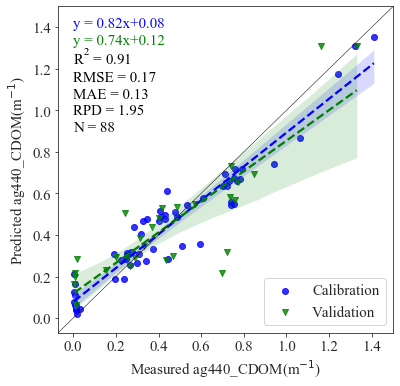

In [981]:
plt.figure(figsize=(6,6))
sns.set_style("ticks",{"xtick.major.size": 8, "ytick.major.size": 8}) 

sns.regplot(x=cal_data_outputs_CDOM,y=cal_data_outputs_pred_CDOM, marker= 'o',color='blue',scatter=True, fit_reg=True, 
            line_kws={'linestyle':'--','color':'blue'},  
            label="Calibration",truncate=True,ci=95)
sns.regplot(x=val_data_outputs_CDOM,y=val_data_outputs_pred_CDOM, marker= 'v',color='green',
            line_kws={'linestyle':'--','color':'green'}, 
            label="Validation",truncate=True,ci=95)

plt.xlim((-0.07,1.5))
plt.ylim((-0.07,1.5))
plt.xticks(fontproperties = 'Times New Roman',fontsize = 15)
plt.yticks(fontproperties = 'Times New Roman',fontsize = 15)

z = range(-1,5,1)
plt.plot(z,z,linewidth = 0.5,color = "k")

plt.rcParams['font.sans-serif'] = ['Times New Roman']
plt.rcParams['axes.unicode_minus'] = False
plt.xlabel('Measured ag440_CDOM(m$^{-1}$)',fontsize=15) 
plt.ylabel('Predicted ag440_CDOM(m$^{-1}$)',fontsize=15) 

plt.text(0,1.4,"y = {k}x+{b}".format(k = myCalK_CDOM,b = myCalIntercept_CDOM), fontproperties = 'Times New Roman',size = 15,
         color = "blue",weight = "light") 
plt.text(0,1.32,"y = {k}x+{b}".format(k = myValK_CDOM,b = myValIntercept_CDOM),fontproperties = 'Times New Roman', size = 15,
         color = "green",weight = "light")
plt.text(0,1.22,"$\mathregular{R^2}$ = %.2f"%myCalR2_CDOM, fontproperties = 'Times New Roman',size = 15,
         color = "k",weight = "light")
plt.text(0,1.14,"RMSE = %.2f"%myValRMSE_CDOM, fontproperties = 'Times New Roman',size = 15,color = "k",weight = "light")
plt.text(0,1.06,"MAE = %.2f"%myValMAE_CDOM, fontproperties = 'Times New Roman',size = 15,color = "k",weight = "light")
plt.text(0,0.98,"RPD = %.2f"%myValRPD_CDOM,fontproperties = 'Times New Roman', size = 15,color = "k",weight = "light")
plt.text(0,0.9,"N = {lenSamplingPointsNumCDOM}".format(lenSamplingPointsNumCDOM = lenCalSampPointsNumCDOM+lenValSampPointsNumCDOM), 
         fontproperties = 'Times New Roman',size = 15,color = "k",weight = "light")

plt.legend(loc = 4,fontsize = 15)

plt.savefig(os.path.join(dir_write,'CDOM(88Points)RF20240811(n_est20,mse,max_dep10,min_samp_sp2,min_samp_le1,min_wei_fra0,min_imp_sp1e-7,ccp_alpha0).jpg'),dpi=300,bbox_inches='tight')
plt.show()